<a href="https://colab.research.google.com/github/Abdullahzulfiqarxyz/MathsStats/blob/main/fitness_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv("fitness_data.csv")
df.head()


,User_ID,Age,Gender,Daily_Steps,Calories_Burned,Workout_Type
0,U1000,56,Male,9112,432,Beginner
1,U1001,46,Female,15202,593,Intermediate
2,U1002,32,Female,6879,295,Intermediate
3,U1003,60,Female,5002,179,Intermediate
4,U1004,25,Male,11600,516,Advanced


| Column          | Type        | Measurement Scale |
| --------------- | ----------- | ----------------- |
| User_ID         | Categorical | Nominal           |
| Age             | Numerical   | Ratio             |
| Gender          | Categorical | Nominal           |
| Daily_Steps     | Numerical   | Ratio             |
| Calories_Burned | Numerical   | Ratio             |
| Workout_Type    | Categorical | Ordinal           |




In [ ]:
# Descriptive stats
daily_steps = df['Daily_Steps']
calories = df['Calories_Burned']



In [ ]:
print("Daily Steps:")
print(f"  Mean: {daily_steps.mean():.2f}")
print(f"  Median: {daily_steps.median():.2f}")
print(f"  Mode: {daily_steps.mode()[0]:.2f}\n")

print("Calories Burned:")
print(f"  Mean: {calories.mean():.2f}")
print(f"  Median: {calories.median():.2f}")
print(f"  Mode: {calories.mode()[0]:.2f}")

Daily Steps:
  Mean: 10641.61
  Median: 10605.00
  Mode: 7741.00

Calories Burned:
  Mean: 478.23
  Median: 469.50
  Mode: 485.00


In [ ]:
# Range

print("Range of Daily Steps:", daily_steps.max() - daily_steps.min())
print("Range of Calories Burned:", calories.max() - calories.min())


Range of Daily Steps: 15286
Range of Calories Burned: 735


In [ ]:
# Variance & Standard Deviation
print(f"Daily Steps - Variance: {daily_steps.var():.2f}, Standard Deviation: {daily_steps.std():.2f}")
print(f"Calories - Variance: {calories.var():.2f}, Standard Deviation: {calories.std():.2f}")


Daily Steps - Variance: 6257596.07, Standard Deviation: 2501.52
Calories - Variance: 16281.09, Standard Deviation: 127.60


In [ ]:

# IQR
Q1_steps = daily_steps.quantile(0.25)
Q3_steps = daily_steps.quantile(0.75)
IQR_steps = Q3_steps - Q1_steps

Q1_cal = calories.quantile(0.25)
Q3_cal = calories.quantile(0.75)
IQR_cal = Q3_cal - Q1_cal

# Interquartile Range (IQR) for Daily Steps
print("Daily Steps:")
print(f"  Q1  : {Q1_steps:.2f}")
print(f"  Q3  : {Q3_steps:.2f}")
print(f"  IQR : {IQR_steps:.2f}\n")

# Interquartile Range (IQR) for Calories
print("Calories:")
print(f"  Q1  : {Q1_cal:.2f}")
print(f"  Q3  : {Q3_cal:.2f}")
print(f"  IQR : {IQR_cal:.2f}")


Daily Steps:
  Q1  : 8961.25
  Q3  : 12299.00
  IQR : 3337.75

Calories:
  Q1  : 389.00
  Q3  : 561.00
  IQR : 172.00


In [ ]:
# CV (Coefficient of Variation)
CV_steps = daily_steps.std() / daily_steps.mean()
CV_cal = calories.std() / calories.mean()
# Coefficient of Variation (CV) for Daily Steps
print("Daily Steps CV:")
print(f"  CV : {CV_steps:.2f}\n")

# Coefficient of Variation (CV) for Calories
print("Calories CV:")
print(f"  CV : {CV_cal:.2f}")

Daily Steps CV:
  CV : 0.24

Calories CV:
  CV : 0.27


In [ ]:


# Quartiles, Percentiles, 5-number summary

print("Daily Steps Summary:")
print(daily_steps.describe())
print("\n" + "-"*40 + "\n")  # Separator with some space

print("Calories Summary:")
print(calories.describe())


Daily Steps Summary:
count     1000.000000
mean     10641.610000
std       2501.518753
min       3196.000000
25%       8961.250000
50%      10605.000000
75%      12299.000000
max      18482.000000
Name: Daily_Steps, dtype: float64

----------------------------------------

Calories Summary:
count    1000.000000
mean      478.231000
std       127.597362
min       134.000000
25%       389.000000
50%       469.500000
75%       561.000000
max       869.000000
Name: Calories_Burned, dtype: float64


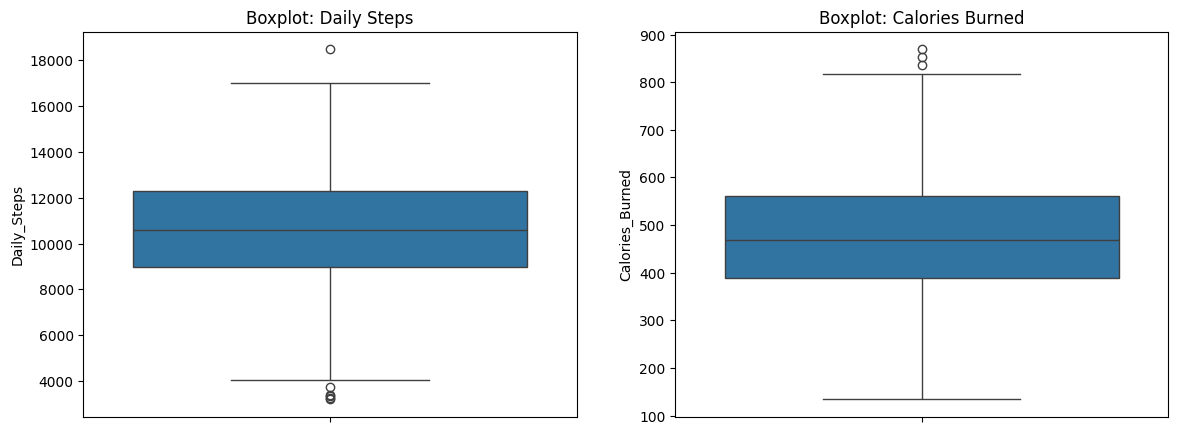

In [ ]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
sns.boxplot(y=daily_steps)
plt.title("Boxplot: Daily Steps")

plt.subplot(1,2,2)
sns.boxplot(y=calories)
plt.title("Boxplot: Calories Burned")

plt.show()

Interpretation:

The Daily Steps distribution is right-skewed (positively skewed).

Meaning:

Most users take steps around 9,000–12,000.

A few users take very high number of steps, pulling the distribution to the right.

Right skew suggests occasional intense activity days.

The Calories Burned distribution is also right-skewed (positively skewed).

Meaning:

Most users burn between 350–550 calories daily.

A smaller group burns much higher calories, likely due to longer or intense workouts.

In [ ]:
# Covariance
cov = np.cov(daily_steps, calories)[0,1]

# Pearson correlation
corr = daily_steps.corr(calories)

print("Covariance:", cov)
print("Correlation:", corr)


Covariance: 277342.4355255255
Correlation: 0.8689021407511786


In [ ]:
sample = df['Daily_Steps'].sample(500, random_state=42)


In [ ]:
# Perform t-test against mean = 10000
t_stat, p_value_two_tailed = stats.ttest_1samp(sample, 10000)

# Convert to one-tailed p-value
p_value_one_tailed = p_value_two_tailed / 2

print("T-statistic:", t_stat)
print("One-tailed p-value:", p_value_one_tailed)


T-statistic: 6.087197382094035
One-tailed p-value: 1.1465948467787543e-09



Because the one-tailed p-value is extremely small (1.146 × 10⁻⁹ < 0.05), we reject the null hypothesis.

Final Inference:

There is strong statistical evidence that the average daily steps of the population are greater than 10,000.